In [52]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import tools

# load modules related to this exercise
import model_project as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# solve the model
par = model.setup()
par.theta0 = 0
par.theta1 = 0.1

par = model.create_grids(par)
sol = model.solve(par)

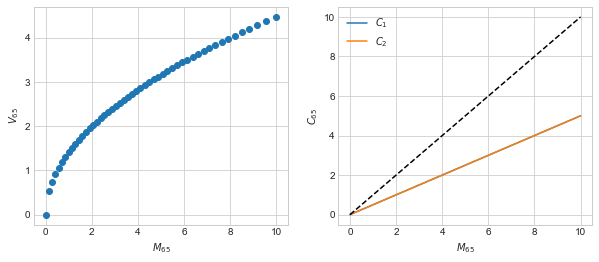

In [121]:
# Define a function for the solution
def plot_solution(sol,par,t,n):
    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    
    ax = fig.add_subplot(1,2,1)
    ax.scatter(par.grid_M,sol.V[t,n])
    ax.set_xlabel("$M_{" + str(t+1) + "}$")
    ax.set_ylabel("$V_{" + str(t+1) + "}$")

    ax_right = fig.add_subplot(1,2,2)
    ax_right.plot(par.grid_M,sol.c1[t,n])
    ax_right.plot(par.grid_M,sol.c2[t,n])
    ax_right.plot(par.grid_M,par.grid_M,color='black',linestyle='dashed')
    ax_right.set_xlabel("$M_{" + str(t+1) + "}$")
    ax_right.set_ylabel("$C_{" + str(t+1) + "}$")
    ax_right.legend(['$C_1$','$C_2$'])
    plt.show()

plot_solution(sol,par,64,0)

In [86]:
par.simN = 100000
sim = model.simulate(par,sol)

In [87]:
fig_path = '/Users/emilblicher/Dropbox/Apps/Overleaf/Dynamic Programming/Figures'

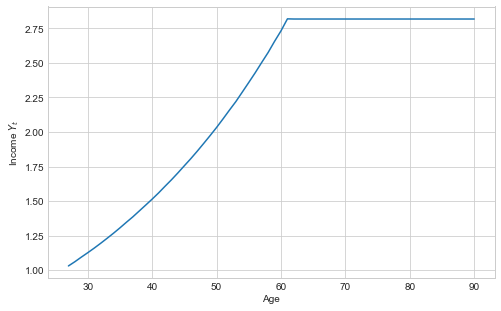

In [88]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.Y,1))
ax.set_xlabel(f"Age")
ax.set_ylabel(f"Income $Y_t$")
#ax.set_title(f'Average income')
plt.savefig(f'{fig_path}/Income.pdf', bbox_inches = 'tight')
plt.show()

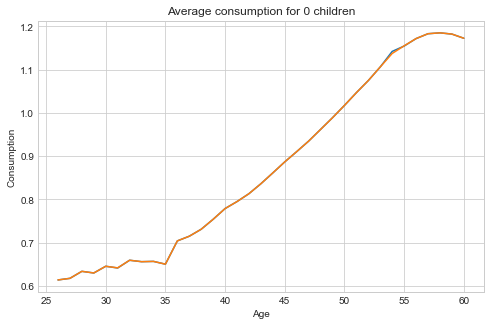

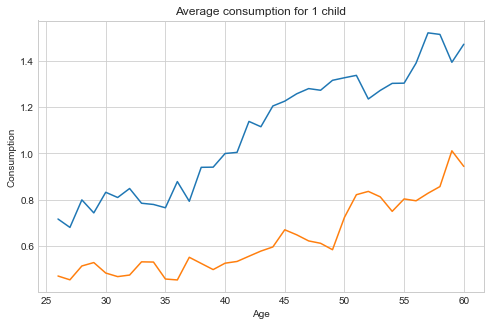

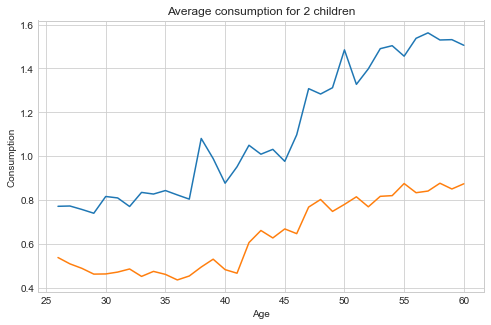

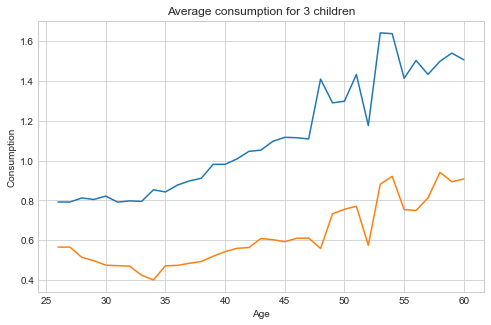

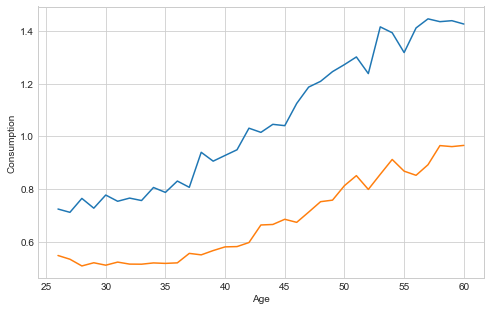

In [93]:
for n in range(5):
    sim = model.simulate(par,sol,n)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.arange(par.Tr)+par.age_min+1,np.mean(sim.C1[:par.Tr],1))
    ax.plot(np.arange(par.Tr)+par.age_min+1,np.mean(sim.C2[:par.Tr],1))
    ax.set_xlabel(f'Age')
    ax.set_ylabel(f'Consumption')
    if n == 1:
        ax.set_title(f'Average consumption for 1 child')
    elif n == 4:
        ax.set_title('')
    else:
        ax.set_title(f'Average consumption for {n} children')
    plt.savefig(f'{fig_path}/consumption{n}.pdf',
                bbox_inches = 'tight')
    plt.show()

In [112]:
cons_dict = {}

for n in range(4):
    sim = model.simulate(par,sol,n)
    cons_dict[f'Consdiff_{n}'] = np.mean(sim.C1[:par.Tr],1) - np.mean(sim.C2[:par.Tr],1)

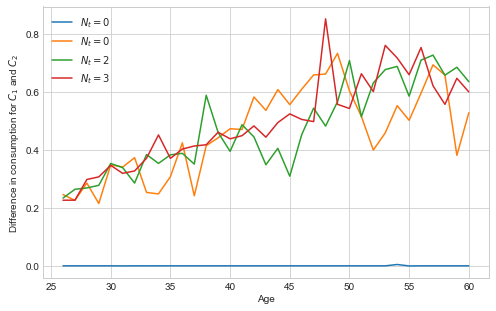

In [127]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.Tr)+par.age_min+1,cons_dict['Consdiff_0'])
ax.plot(np.arange(par.Tr)+par.age_min+1,cons_dict['Consdiff_1'])
ax.plot(np.arange(par.Tr)+par.age_min+1,cons_dict['Consdiff_2'])
ax.plot(np.arange(par.Tr)+par.age_min+1,cons_dict['Consdiff_3'])
ax.set_xlabel(f'Age')
ax.set_ylabel(f'Difference in consumption for $C_1$ and $C_2$')
ax.legend(['$N_t=0$', '$N_t=0$', '$N_t=2$', '$N_t=3$'])
plt.savefig(fig_path + '/Diffcons.pdf', bbox_inches = 'tight')
plt.show()

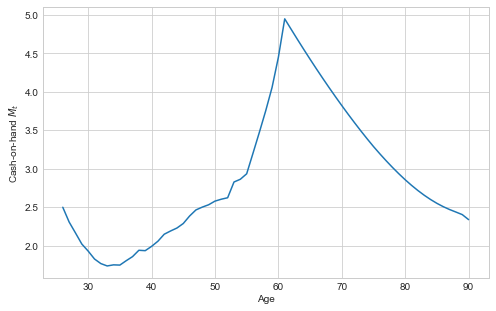

In [99]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.M,1))
ax.set_xlabel('Age')
ax.set_ylabel('Cash-on-hand $M_t$')
#ax.set_title(f'Average Cash on hands')
plt.savefig(fig_path + '/Mt.pdf', bbox_inches = 'tight')
plt.show()

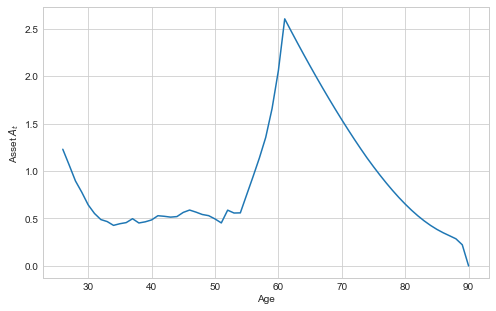

In [101]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.simT)+par.age_min+1,np.mean(sim.A,1))
ax.set_xlabel(f"Age")
ax.set_ylabel(f"Asset $A_t$")
#ax.set_title(f'Average Asset')
plt.savefig(fig_path + '/At.pdf', bbox_inches = 'tight')
plt.show()

In [38]:
def theta(theta0,theta1,N):
    return 1/(1+(np.exp(-(theta0+theta1*N))))

def theta_fig(theta0,theta1):
    N_list = [N for N in range(51)]
    theta_list = []

    for N in N_list:
        theta_list.append(theta(theta0,theta1,N))

    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    ax = fig.add_subplot(1,1,1)
    ax.plot(N_list,theta_list,'o')
    ax.set_xlabel(f"Number of children")
    ax.set_ylabel(f"$\\theta(\\theta_0,\\theta_1,N)$")
    plt.show()

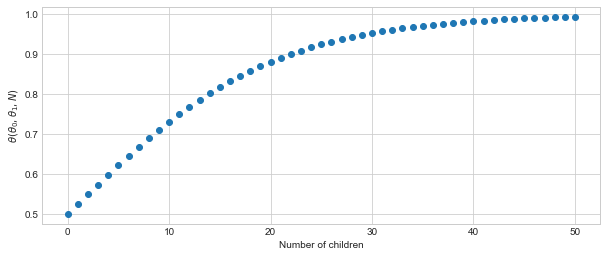

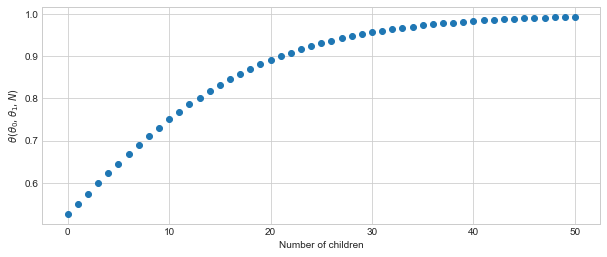

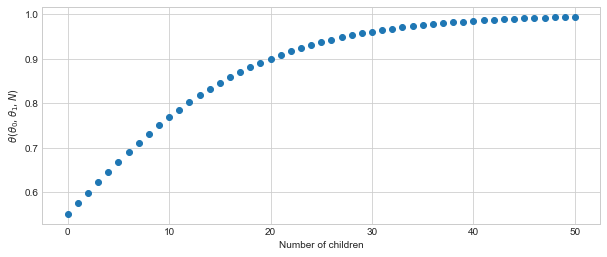

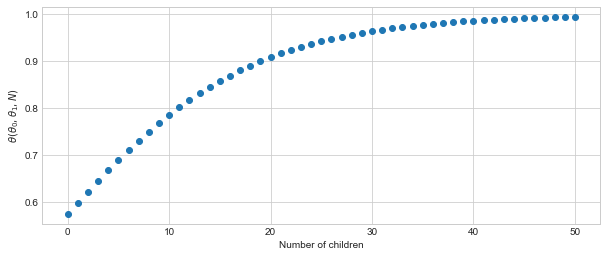

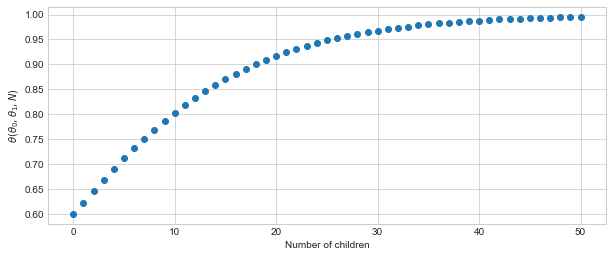

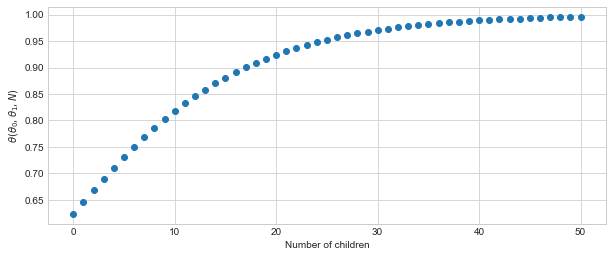

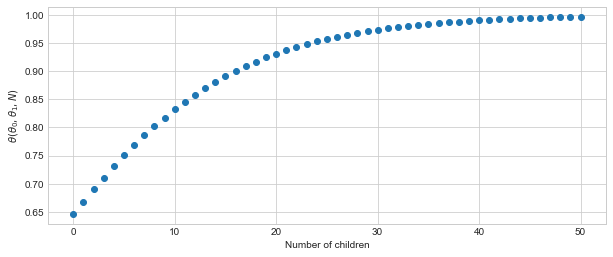

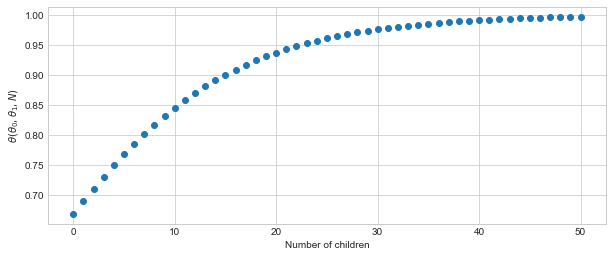

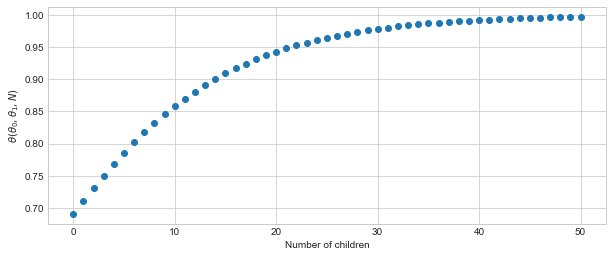

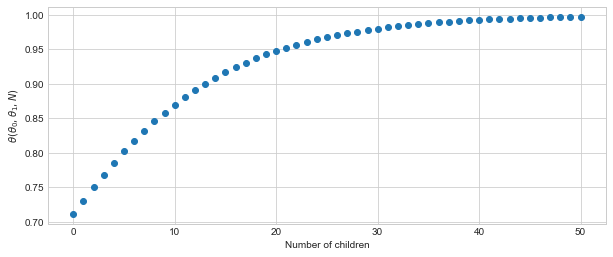

In [61]:
theta0 = [t for t in np.linspace(0,1,11)]
theta0 = theta0[:10]
theta1 = [t for t in np.linspace(0.1,1,10)]

for t0 in theta0:
    theta_fig(t0,theta1=0.1)

In [450]:
weights = []

for i in range(par.Tr):
    if i < 21:
        weights.append([1,1,1,1])
    else:
        weights.append([np.nan]*4)
        
child0 = [1]*20
child1 = np.linspace(1,0.1,par.Tr-21)
child2 = np.linspace(1,0.2,par.Tr-21)
child3 = np.linspace(1,0.3,par.Tr-21)

for i,l in enumerate(weights):
    if i >= 21:
        weights[i] = [child0[i-21],child1[i-21],child2[i-21],child3[i-21]]
weights = np.array(weights)

In [451]:
weights3d = np.nan + np.zeros((35, 4, 50))
for t in range(par.Tr):
    for m in range(par.num_M):
        weights3d[t,:,m] = weights[t]

In [452]:
wc1 = np.nan + np.zeros((65,4,50))
wc2 = np.nan + np.zeros((65,4,50))

for t in range(par.T):
    if t < par.Tr:
        wc1[t,:,:] = sol.c1[t,:,:]*weights3d[t,:,:]
        wc2[t,:,:] = sol.c2[t,:,:]*weights3d[t,:,:]
    else:
        wc1[t,:,:] = sol.c1[t,:,:]
        wc2[t,:,:] = sol.c2[t,:,:]

In [462]:
sol.mean_c1 = np.mean(sol.c1, 1)
sol.mean_c2 = np.mean(sol.c2, 1)

In [94]:
rho = 10

def util(c,rho):
    return (c**(1-rho)-1)/(1-rho)

util(10,rho)

0.111111111